<a href="https://colab.research.google.com/github/Remon19/CarProject/blob/main/CarProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets

In [3]:
# creating new directory for the our CarProject
import os
path = os.path.join("/content/CarProject") 
print(path)
os.mkdir(path)
os.chdir(path)

/content/CarProject


In [5]:
#downloading dataset from kaggle using kaggle API
import opendatasets as od
od.download("https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: remontal3at
Your Kaggle Key: ··········


100%|██████████| 227k/227k [00:00<00:00, 46.9MB/s]

In [7]:
os.rename('/content/CarProject/vehicle-dataset-from-cardekho','dataset')

In [14]:
import pandas as pd
import numpy as np


In [37]:
df = pd.read_csv(str(os.getcwd()) + '/dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [38]:
df.shape

(4340, 8)

In [ ]:
#exploring categorical features
print(df['seller_type'].unique())
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

In [39]:
#any missing data
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [40]:
#removing name column from data 
df.drop(labels='name',axis=1,inplace=True)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [41]:
#adding the life of the car till now in total_years columns
import datetime
currentYear = datetime.datetime.now().year
df['total_years'] = currentYear - df['year']
df.drop(labels='year',axis=1,inplace=True)
df.head()

In [ ]:
#converting categorical features into dummy variables
df=pd.get_dummies(df,drop_first=True)
df.head()

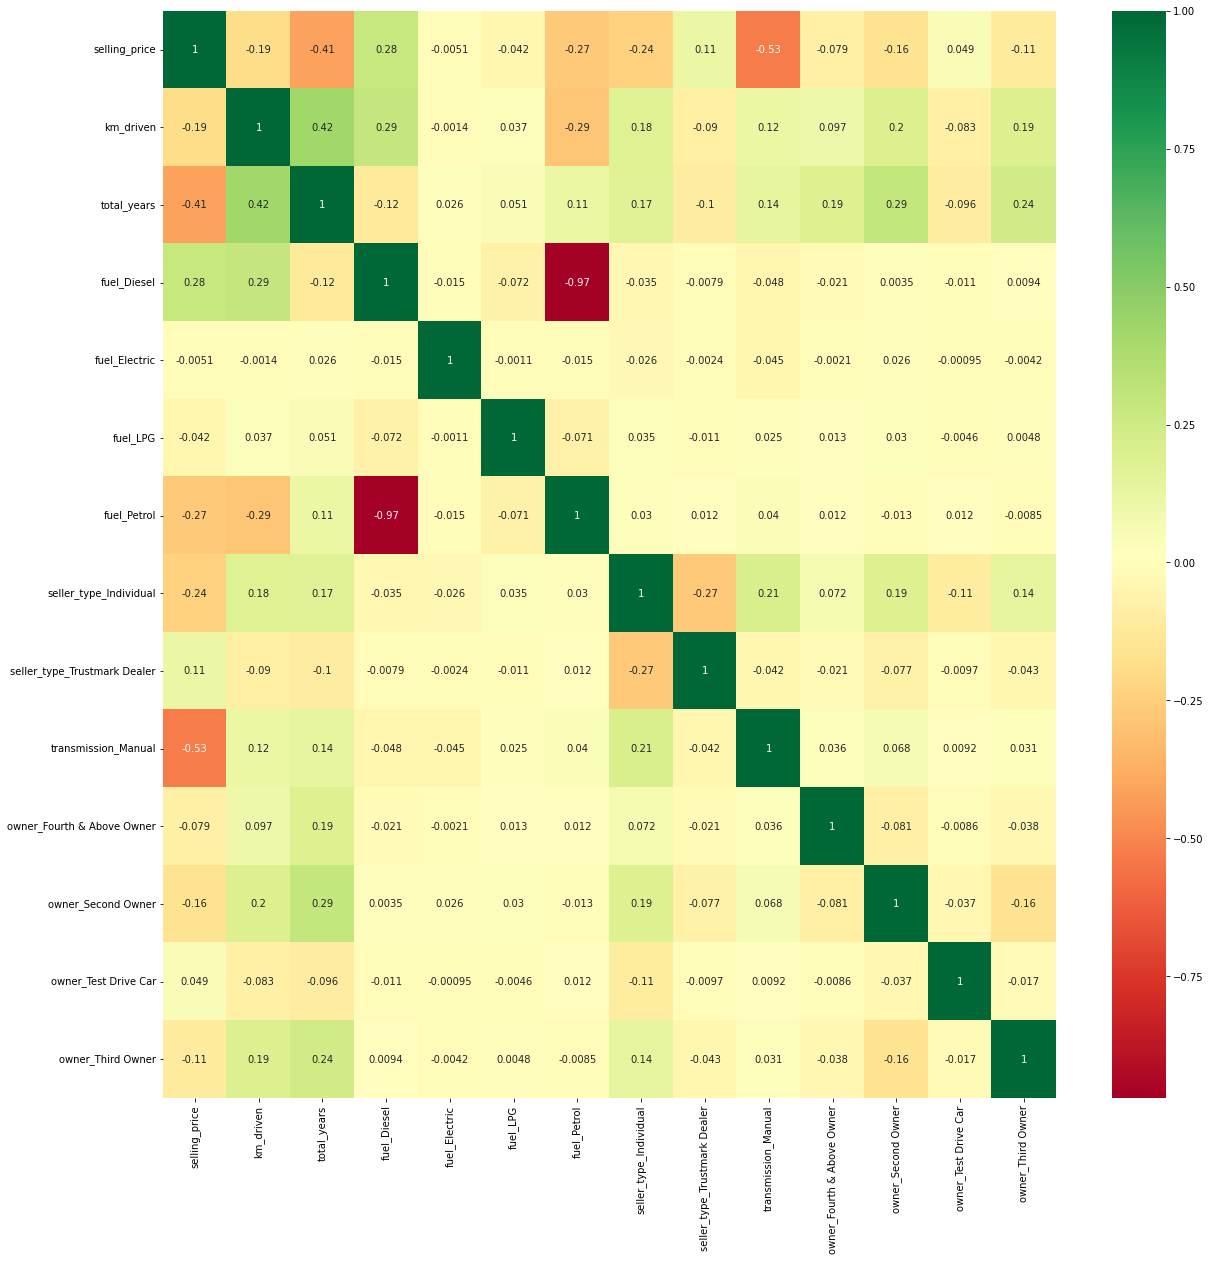

In [44]:
#correlation between features
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
correlationMatrix = df.corr()
top_corr_features=correlationMatrix.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
df.head()

,selling_price,km_driven,total_years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,15,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,15,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,10,1,0,0,0,1,0,1,0,0,0,0
3,250000,46000,5,0,0,0,1,1,0,1,0,0,0,0
4,450000,141000,8,1,0,0,0,1,0,1,0,1,0,0


In [46]:
#indpendant & dependent features
x = df.iloc[:,1:]
y = df.iloc[:,0]

[2.41452120e-01 2.57100380e-01 1.29044281e-01 3.08348284e-05
 2.43909006e-05 2.25615938e-04 4.62266733e-02 7.78648082e-03
 2.92836831e-01 7.01362151e-04 2.00383237e-02 5.27493349e-04
 4.00521284e-03]


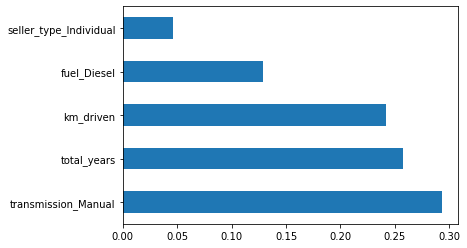

In [47]:
#visualization of first 5 important features
from sklearn.ensemble import ExtraTreesRegressor
extraTreeReg = ExtraTreesRegressor()
extraTreeReg.fit(x,y)
print(extraTreeReg.feature_importances_)
feat_importances = pd.Series(extraTreeReg.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [48]:
#splitting data into train/test split
split = 0.2 #split ratio = 80% 20% 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = split)

In [50]:
x_train.shape

(3472, 13)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor()


In [53]:
from pandas.core.common import random_state
##hyperparaeter tuning using random search 
n_estimators = [int(i) for i in np.linspace(100,1200,12)]
max_features = ['auto','sqrt']
max_depth =[int(i) for i in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [2,5,10]

random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

rf_random = RandomizedSearchCV(estimator=model,param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                               n_iter=10,cv = 5, verbose = 2, random_state = 42, n_jobs= 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
#car selling price predictions
predictions = rf_random.predict(x_test)
print(predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


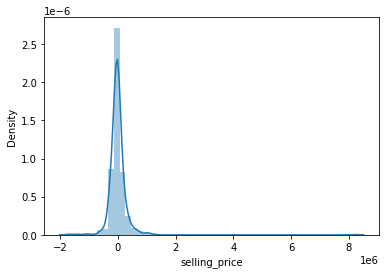

In [55]:
sns.distplot(y_test - predictions)

In [68]:
#saving the model as pickle file
import pickle
file = open('randomForestRegressionModel.pkl','wb')
pickle.dump(rf_random, file)